In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import holoviews as hv
hv.config(style_17=True)
import holoviews.plotting.mpl
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import math
from sklearn.linear_model import LogisticRegression

In [3]:
donné = pd.read_csv("C:/Users/Ahmad/Desktop/MVP/prospect.csv", encoding="ISO-8859-1", engine='python')

In [4]:
donné.head(15)

,Unnamed: 0,small,email,ETABLISSEMENT,CPETAB,VILLEETAB,ACADEMIE,NUMERODEVIS,PAYS,DESTINATION,...,montantTotal,Reduction,kilometrageAllerRetourTotalAutocarRetenu,typeTransport,ETATDEVIS,Appartenance,EMAILCREATEUR,STATUTDEVIS,DATEDEVIS,devis
0,0,Mme,5cda9f5f32377@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1685.0,Grande-Bretagne,Chester,...,16766.01,Basse Saison,2995.00,Autocar + Traversée,Traité,Commercial,marcos@becfrance.com,Première demande,2015-10-20 00:00:00,Devis rejeté
1,1,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,10963.29,Basse Saison,1884.00,Autocar,Traité,Commercial,caroline@becfrance.com,Devis rejeté,2015-09-07 00:00:00,Devis rejeté
2,2,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,14708.33,Basse Saison,1884.00,Autocar,Traité,Commercial,caroline@becfrance.com,Devis rejeté,2015-09-07 00:00:00,Devis rejeté
3,3,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,28719.50,Aucune,695.00,TGV + Autocar français,Traité,Commercial,caroline@becfrance.com,Première demande,2019-03-27 00:00:00,Devis rejeté
4,4,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,19470.83,Aucune,2685.00,Autocar + Traversée,Traité,Commercial,caroline@becfrance.com,Première demande,2019-03-27 00:00:00,Devis rejeté
5,5,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,10935.16,Très basse saison,2419.12,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté
6,6,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,14431.33,Très basse saison,2419.12,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté
7,7,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,10935.16,Très basse saison,2419.12,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté
8,8,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,13101.23,Aucune,2419.12,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté
9,9,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,13978.02,Aucune,2419.12,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté


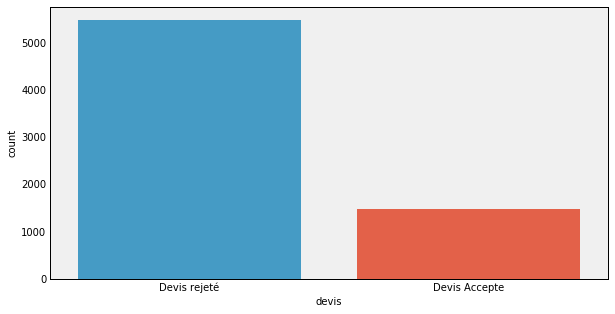

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(donné['devis'])
plt.show()

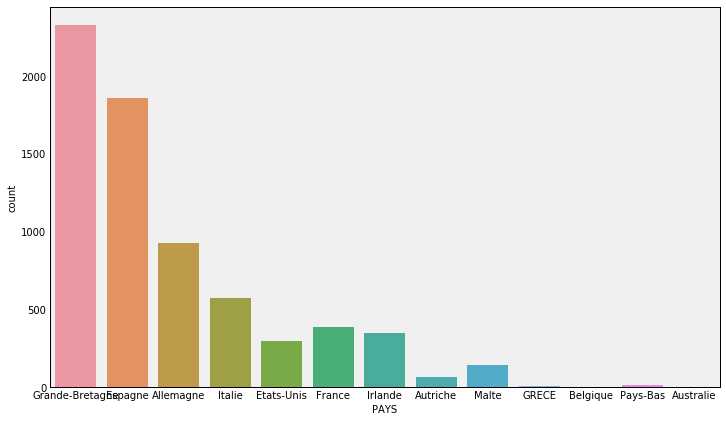

In [6]:
plt.figure(figsize=(12,7))
sns.countplot(donné['PAYS'])
plt.show()


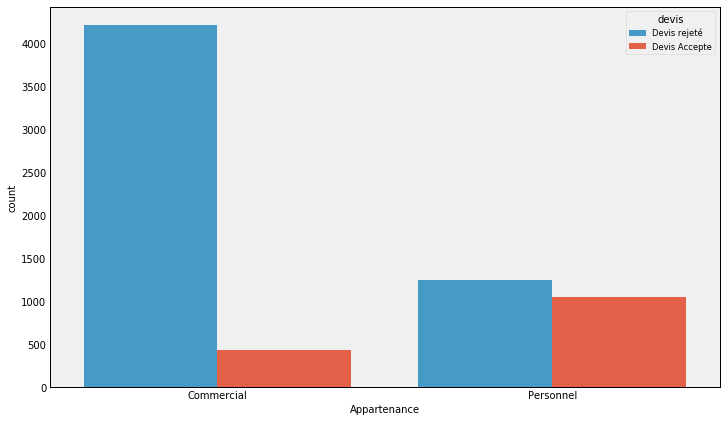

In [7]:
plt.figure(figsize=(12,7))
s1=sns.countplot(donné['Appartenance'], hue=donné.devis)
s1.set_xticklabels(s1.get_xticklabels(),rotation=360)
plt.show()

In [8]:
#Déterminons un dictionnaire qui représente les catégories d'établissement
categorie={
    "COLLEGE" : "COLLEGE",
    "LEAP" : "LYCEE",
    "LP" : "LYCEE",
    "LYCEE" : "LYCEE",
}

holoviews.plotting.mpl.chart.BarPlot

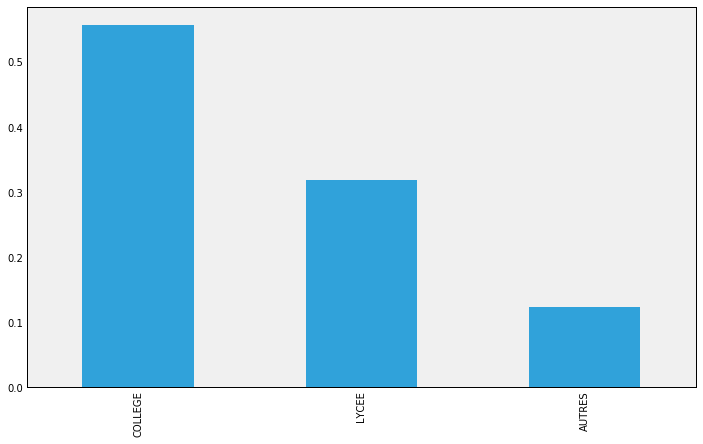

In [9]:
# Affectation des différents établissements à une categorie 
def detect_words(values, dictionary):
    result = []
    for lib in values:
        operation_type = "AUTRES"
        for word, val in dictionary.items():
            if word in lib:
                operation_type = val
        result.append(operation_type)
    return result
plt.figure(figsize=(12,7))
donné["categ_etab"] = detect_words(donné["ETABLISSEMENT"], categorie)

donné["categ_etab"].value_counts(normalize=True).plot(kind='bar')
holoviews.plotting.mpl.chart.BarPlot

# ce commande nous permet de voir la distribution sur notre variable

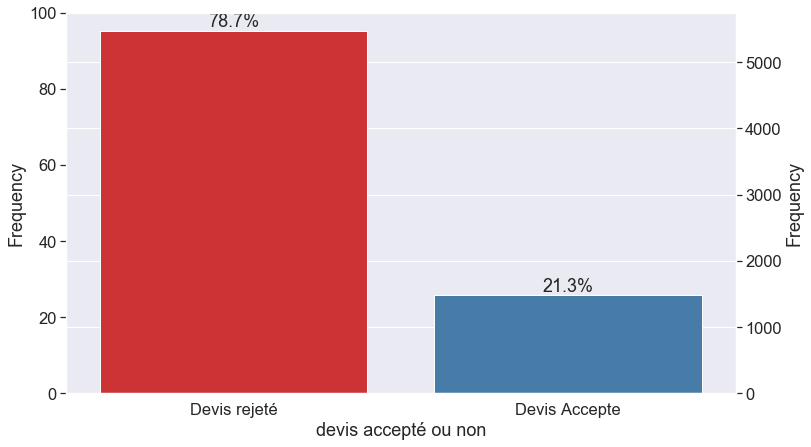

In [11]:
# Détermination de la distribution de la variable target
#""""""""##
def add_freq():
    ncount = len(donné)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)
    
####""""""########
ax = sns.countplot(x = donné["devis"] ,palette="Set1") 
sns.set(font_scale=1.5)
ax.set_xlabel('devis accepté ou non')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(12,7)
add_freq()
plt.show()

In [12]:
donné['devis'].value_counts()

Devis rejeté     5474
Devis Accepte    1480
Name: devis, dtype: int64

# Creation de fonction pour avoir les proportion par academy et par etablissement sur le nombre total de devis accepté

In [13]:
Akdemy=list(donné['ACADEMIE'])

In [14]:
liste=[]
def indique_total_devis_par_groupe(donnees,col,liste):
    total_devis_academy=[]

    for i in liste:
    
        aca=donnees[donnees[col]==i]
        devis=len(aca)
    
    
        total_devis_academy.append(devis)
    
    
    
    return total_devis_academy

In [15]:
liste=[]
def indique_devis_accepte_par_groupe(donnees,col,liste):
    devis_accepte_academy=[]

    for i in liste:

        aca=donnees[donnees[col]==i]
        accepte=aca[aca['devis']=='Devis Accepte']
        nombre=len(accepte)
        devis_accepte_academy.append(nombre)


    return devis_accepte_academy 

In [16]:
donné['total devis par academy']=indique_total_devis_par_groupe(donné,'ACADEMIE',Akdemy)
donné[' devis accepte par academy']=indique_devis_accepte_par_groupe(donné,'ACADEMIE',Akdemy)
donné

,Unnamed: 0,small,email,ETABLISSEMENT,CPETAB,VILLEETAB,ACADEMIE,NUMERODEVIS,PAYS,DESTINATION,...,typeTransport,ETATDEVIS,Appartenance,EMAILCREATEUR,STATUTDEVIS,DATEDEVIS,devis,categ_etab,total devis par academy,devis accepte par academy
0,0,Mme,5cda9f5f32377@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1685.0,Grande-Bretagne,Chester,...,Autocar + Traversée,Traité,Commercial,marcos@becfrance.com,Première demande,2015-10-20 00:00:00,Devis rejeté,COLLEGE,304,85
1,1,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,Autocar,Traité,Commercial,caroline@becfrance.com,Devis rejeté,2015-09-07 00:00:00,Devis rejeté,COLLEGE,304,85
2,2,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,Autocar,Traité,Commercial,caroline@becfrance.com,Devis rejeté,2015-09-07 00:00:00,Devis rejeté,COLLEGE,304,85
3,3,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,TGV + Autocar français,Traité,Commercial,caroline@becfrance.com,Première demande,2019-03-27 00:00:00,Devis rejeté,LYCEE,304,85
4,4,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,Autocar + Traversée,Traité,Commercial,caroline@becfrance.com,Première demande,2019-03-27 00:00:00,Devis rejeté,LYCEE,304,85
5,5,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67
6,6,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67
7,7,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67
8,8,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67
9,9,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Autocar,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67


In [17]:
donné[' academy accepte']=donné[' devis accepte par academy']/ donné['total devis par academy']
donné

,Unnamed: 0,small,email,ETABLISSEMENT,CPETAB,VILLEETAB,ACADEMIE,NUMERODEVIS,PAYS,DESTINATION,...,ETATDEVIS,Appartenance,EMAILCREATEUR,STATUTDEVIS,DATEDEVIS,devis,categ_etab,total devis par academy,devis accepte par academy,academy accepte
0,0,Mme,5cda9f5f32377@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1685.0,Grande-Bretagne,Chester,...,Traité,Commercial,marcos@becfrance.com,Première demande,2015-10-20 00:00:00,Devis rejeté,COLLEGE,304,85,0.279605
1,1,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,Traité,Commercial,caroline@becfrance.com,Devis rejeté,2015-09-07 00:00:00,Devis rejeté,COLLEGE,304,85,0.279605
2,2,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,Traité,Commercial,caroline@becfrance.com,Devis rejeté,2015-09-07 00:00:00,Devis rejeté,COLLEGE,304,85,0.279605
3,3,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,Traité,Commercial,caroline@becfrance.com,Première demande,2019-03-27 00:00:00,Devis rejeté,LYCEE,304,85,0.279605
4,4,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,Traité,Commercial,caroline@becfrance.com,Première demande,2019-03-27 00:00:00,Devis rejeté,LYCEE,304,85,0.279605
5,5,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532
6,6,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532
7,7,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532
8,8,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532
9,9,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Traité,Commercial,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532


In [18]:
destination=list(donné['DESTINATION'])
 
donné['total devis par destination']=indique_total_devis_par_groupe(donné,'DESTINATION',destination)
donné[' devis accepte par destination']=indique_devis_accepte_par_groupe(donné,'DESTINATION',destination)
donné

,Unnamed: 0,small,email,ETABLISSEMENT,CPETAB,VILLEETAB,ACADEMIE,NUMERODEVIS,PAYS,DESTINATION,...,EMAILCREATEUR,STATUTDEVIS,DATEDEVIS,devis,categ_etab,total devis par academy,devis accepte par academy,academy accepte,total devis par destination,devis accepte par destination
0,0,Mme,5cda9f5f32377@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1685.0,Grande-Bretagne,Chester,...,marcos@becfrance.com,Première demande,2015-10-20 00:00:00,Devis rejeté,COLLEGE,304,85,0.279605,78,21
1,1,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,caroline@becfrance.com,Devis rejeté,2015-09-07 00:00:00,Devis rejeté,COLLEGE,304,85,0.279605,367,56
2,2,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,caroline@becfrance.com,Devis rejeté,2015-09-07 00:00:00,Devis rejeté,COLLEGE,304,85,0.279605,367,56
3,3,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,caroline@becfrance.com,Première demande,2019-03-27 00:00:00,Devis rejeté,LYCEE,304,85,0.279605,1159,226
4,4,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,caroline@becfrance.com,Première demande,2019-03-27 00:00:00,Devis rejeté,LYCEE,304,85,0.279605,1159,226
5,5,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532,104,17
6,6,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532,104,17
7,7,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532,104,17
8,8,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532,104,17
9,9,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,frederic@becfrance.com,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532,104,17


In [19]:
donné[' destination accepte']=donné[' devis accepte par destination']/ donné['total devis par destination']
donné

,Unnamed: 0,small,email,ETABLISSEMENT,CPETAB,VILLEETAB,ACADEMIE,NUMERODEVIS,PAYS,DESTINATION,...,STATUTDEVIS,DATEDEVIS,devis,categ_etab,total devis par academy,devis accepte par academy,academy accepte,total devis par destination,devis accepte par destination,destination accepte
0,0,Mme,5cda9f5f32377@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1685.0,Grande-Bretagne,Chester,...,Première demande,2015-10-20 00:00:00,Devis rejeté,COLLEGE,304,85,0.279605,78,21,0.269231
1,1,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,Devis rejeté,2015-09-07 00:00:00,Devis rejeté,COLLEGE,304,85,0.279605,367,56,0.152589
2,2,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,Devis rejeté,2015-09-07 00:00:00,Devis rejeté,COLLEGE,304,85,0.279605,367,56,0.152589
3,3,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,Première demande,2019-03-27 00:00:00,Devis rejeté,LYCEE,304,85,0.279605,1159,226,0.194996
4,4,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,Première demande,2019-03-27 00:00:00,Devis rejeté,LYCEE,304,85,0.279605,1159,226,0.194996
5,5,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532,104,17,0.163462
6,6,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532,104,17,0.163462
7,7,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532,104,17,0.163462
8,8,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532,104,17,0.163462
9,9,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Devis rejeté,2018-06-18 00:00:00,Devis rejeté,COLLEGE,308,67,0.217532,104,17,0.163462


In [20]:
etablissement=list(donné['ETABLISSEMENT'])
 
donné['total devis par ETABLISSEMENT']=indique_total_devis_par_groupe(donné,'ETABLISSEMENT',etablissement)
donné[' devis accepte par ETABLISSEMENT']=indique_devis_accepte_par_groupe(donné,'ETABLISSEMENT',etablissement)
donné

,Unnamed: 0,small,email,ETABLISSEMENT,CPETAB,VILLEETAB,ACADEMIE,NUMERODEVIS,PAYS,DESTINATION,...,devis,categ_etab,total devis par academy,devis accepte par academy,academy accepte,total devis par destination,devis accepte par destination,destination accepte,total devis par ETABLISSEMENT,devis accepte par ETABLISSEMENT
0,0,Mme,5cda9f5f32377@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1685.0,Grande-Bretagne,Chester,...,Devis rejeté,COLLEGE,304,85,0.279605,78,21,0.269231,5,0
1,1,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,Devis rejeté,COLLEGE,304,85,0.279605,367,56,0.152589,5,0
2,2,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,Devis rejeté,COLLEGE,304,85,0.279605,367,56,0.152589,5,0
3,3,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,Devis rejeté,LYCEE,304,85,0.279605,1159,226,0.194996,2,0
4,4,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,Devis rejeté,LYCEE,304,85,0.279605,1159,226,0.194996,2,0
5,5,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Devis rejeté,COLLEGE,308,67,0.217532,104,17,0.163462,5,0
6,6,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Devis rejeté,COLLEGE,308,67,0.217532,104,17,0.163462,5,0
7,7,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Devis rejeté,COLLEGE,308,67,0.217532,104,17,0.163462,5,0
8,8,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Devis rejeté,COLLEGE,308,67,0.217532,104,17,0.163462,5,0
9,9,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,Devis rejeté,COLLEGE,308,67,0.217532,104,17,0.163462,5,0


In [21]:
donné[' ETABLISSEMENT accepte']=donné[' devis accepte par ETABLISSEMENT']/ donné['total devis par ETABLISSEMENT']

donné

,Unnamed: 0,small,email,ETABLISSEMENT,CPETAB,VILLEETAB,ACADEMIE,NUMERODEVIS,PAYS,DESTINATION,...,categ_etab,total devis par academy,devis accepte par academy,academy accepte,total devis par destination,devis accepte par destination,destination accepte,total devis par ETABLISSEMENT,devis accepte par ETABLISSEMENT,ETABLISSEMENT accepte
0,0,Mme,5cda9f5f32377@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1685.0,Grande-Bretagne,Chester,...,COLLEGE,304,85,0.279605,78,21,0.269231,5,0,0.000000
1,1,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,COLLEGE,304,85,0.279605,367,56,0.152589,5,0,0.000000
2,2,Mme,5cda9f99521fb@mail.com,COLLEGE PAUL EMILE VICTOR,34300.0,AGDE,Académie de Montpellier,1117.0,Espagne,Madrid,...,COLLEGE,304,85,0.279605,367,56,0.152589,5,0,0.000000
3,3,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,LYCEE,304,85,0.279605,1159,226,0.194996,2,0,0.000000
4,4,Mme,5cda9fb85fe28@mail.com,LYCEE AUGUSTE LOUBATIERES,34300.0,AGDE,Académie de Montpellier,4949.0,Grande-Bretagne,Londres,...,LYCEE,304,85,0.279605,1159,226,0.194996,2,0,0.000000
5,5,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,COLLEGE,308,67,0.217532,104,17,0.163462,5,0,0.000000
6,6,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,COLLEGE,308,67,0.217532,104,17,0.163462,5,0,0.000000
7,7,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,COLLEGE,308,67,0.217532,104,17,0.163462,5,0,0.000000
8,8,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,COLLEGE,308,67,0.217532,104,17,0.163462,5,0,0.000000
9,9,Mme,5cda9fb323646@mail.com,COLLEGE JOSEPH CHAUMIE,47000.0,AGEN,Académie de Bordeaux,4176.0,Allemagne,Cologne,...,COLLEGE,308,67,0.217532,104,17,0.163462,5,0,0.000000


# supprimer les colonnes dont on a pas besoin lors du model

In [22]:
donnees = donné.drop(['ETATDEVIS','small',
                        'email','CPETAB','VILLEETAB','NUMERODEVIS','ETATSCENARIO',
                        'STATUTDEVIS','total devis par academy',' devis accepte par ETABLISSEMENT',
                        'total devis par ETABLISSEMENT','total devis par destination',' devis accepte par destination','total devis par destination',
                        ' devis accepte par academy','ETABLISSEMENT','ACADEMIE','DESTINATION',
                     'dateDebutSejour', 'dateFinSejour','DATEDEVIS'],axis=1 )

In [23]:
#la matrice de correlation
corr = pd.DataFrame()
corr = donnees.corr()
corr

,Unnamed: 0,nombreElevesMoins16,nombreElevesEntre16et18,nombreEleves18etPlus,nombreAccompagnant,montantTotal,kilometrageAllerRetourTotalAutocarRetenu,academy accepte,destination accepte,ETABLISSEMENT accepte
Unnamed: 0,1.000000,-0.051254,0.004549,0.066754,-0.015110,0.035461,-0.022222,0.041409,0.025591,-0.028789
nombreElevesMoins16,-0.051254,1.000000,-0.775694,-0.146284,0.457909,0.135951,-0.070445,-0.022377,0.038080,-0.019120
nombreElevesEntre16et18,0.004549,-0.775694,1.000000,-0.077161,0.023055,0.099062,0.107387,0.022508,-0.049512,0.057567
nombreEleves18etPlus,0.066754,-0.146284,-0.077161,1.000000,-0.031730,0.068091,-0.005693,-0.008149,-0.013688,-0.050865
nombreAccompagnant,-0.015110,0.457909,0.023055,-0.031730,1.000000,0.327718,-0.009170,-0.000281,-0.031495,0.036372
montantTotal,0.035461,0.135951,0.099062,0.068091,0.327718,1.000000,-0.089162,0.014289,0.078843,0.067204
kilometrageAllerRetourTotalAutocarRetenu,-0.022222,-0.070445,0.107387,-0.005693,-0.009170,-0.089162,1.000000,0.011381,-0.095964,-0.046471
academy accepte,0.041409,-0.022377,0.022508,-0.008149,-0.000281,0.014289,0.011381,1.000000,0.077223,0.135972
destination accepte,0.025591,0.038080,-0.049512,-0.013688,-0.031495,0.078843,-0.095964,0.077223,1.000000,0.264620
ETABLISSEMENT accepte,-0.028789,-0.019120,0.057567,-0.050865,0.036372,0.067204,-0.046471,0.135972,0.264620,1.000000


In [24]:
#transformation ou encodage
data = pd.get_dummies(donnees, drop_first=True)
data.head(10)

,Unnamed: 0,nombreElevesMoins16,nombreElevesEntre16et18,nombreEleves18etPlus,nombreAccompagnant,montantTotal,kilometrageAllerRetourTotalAutocarRetenu,academy accepte,destination accepte,ETABLISSEMENT accepte,...,EMAILCREATEUR_eric@becfrance.com,EMAILCREATEUR_fabien@becfrance.com,EMAILCREATEUR_frederic@becfrance.com,EMAILCREATEUR_gilles@becfrance.com,EMAILCREATEUR_lea@becfrance.com,EMAILCREATEUR_marcos@becfrance.com,EMAILCREATEUR_pierre@becfrance.com,devis_Devis rejeté,categ_etab_COLLEGE,categ_etab_LYCEE
0,0,49.0,0.0,0.0,4.0,16766.01,2995.00,0.279605,0.269231,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1,0.0,28.0,0.0,2.0,10963.29,1884.00,0.279605,0.152589,0.0,...,0,0,0,0,0,0,0,1,1,0
2,2,0.0,49.0,0.0,4.0,14708.33,1884.00,0.279605,0.152589,0.0,...,0,0,0,0,0,0,0,1,1,0
3,3,0.0,49.0,0.0,4.0,28719.50,695.00,0.279605,0.194996,0.0,...,0,0,0,0,0,0,0,1,0,1
4,4,0.0,49.0,0.0,4.0,19470.83,2685.00,0.279605,0.194996,0.0,...,0,0,0,0,0,0,0,1,0,1
5,5,25.0,0.0,0.0,3.0,10935.16,2419.12,0.217532,0.163462,0.0,...,0,0,1,0,0,0,0,1,1,0
6,6,49.0,0.0,0.0,4.0,14431.33,2419.12,0.217532,0.163462,0.0,...,0,0,1,0,0,0,0,1,1,0
7,7,25.0,0.0,0.0,3.0,10935.16,2419.12,0.217532,0.163462,0.0,...,0,0,1,0,0,0,0,1,1,0
8,8,25.0,0.0,0.0,3.0,13101.23,2419.12,0.217532,0.163462,0.0,...,0,0,1,0,0,0,0,1,1,0
9,9,30.0,0.0,0.0,3.0,13978.02,2419.12,0.217532,0.163462,0.0,...,0,0,1,0,0,0,0,1,1,0


In [25]:
#selection des colonnes variables explicatives
feat = data.drop(columns=['devis_Devis rejeté'],axis=1)
label = data["devis_Devis rejeté"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.3, shuffle=True)

In [27]:
sto_gradien = linear_model.SGDClassifier(max_iter = 1000, tol=0)
sto_gradien = sto_gradien.fit(X_train, y_train)

In [28]:
prediction = sto_gradien.predict(X_train)

accuracy_train = accuracy_score(y_train, prediction)
accuracy_train

0.7805629751386891

In [29]:
prediction = sto_gradien.predict(X_test)

accuracy_test = accuracy_score(y_test, prediction)
accuracy_test

0.7886919022520364

# voir le tableau de bord avec les scores

In [30]:
resultats_exp = pd.DataFrame({"Modèle": [], "Train": [], "Test": [], "Delta": []})

def add_score(nom, acc_train, acc_test):
    resultats_exp.loc[len(resultats_exp)] = [nom, acc_train, acc_test, math.fabs(acc_train-acc_test)]
    return resultats_exp

add_score("Linéaire", accuracy_train, accuracy_test)

,Modèle,Train,Test,Delta
0,Linéaire,0.780563,0.788692,0.008129


In [31]:
stg_cv_score = cross_val_score(sto_gradien, feat, label, cv=10, scoring='roc_auc')

In [32]:
stg_cv_score

array([0.50992553, 0.46793007, 0.4238262 , 0.67645246, 0.48116261,
       0.50234695, 0.54244281, 0.46006473, 0.55078067, 0.46930431])

# randomforest classifier

In [33]:
rfc = RandomForestClassifier(max_depth=6, n_estimators=100)
rfc = rfc.fit(X_train, y_train)

In [35]:
prediction = rfc.predict(X_train)

accuracy_train = accuracy_score(y_train, prediction)
accuracy_train

0.9319909595233203

In [36]:
prediction = rfc.predict(X_test)

accuracy_test = accuracy_score(y_test, prediction)
accuracy_test

0.9175850503114519

In [39]:
add_score("randomforest", accuracy_train, accuracy_test)

,Modèle,Train,Test,Delta
0,Linéaire,0.780563,0.788692,0.008129
1,randomforest,0.931991,0.917585,0.014406
2,randomforest,0.931991,0.917585,0.014406
3,randomforest,0.931991,0.917585,0.014406


In [41]:
rfc_cv_score = cross_val_score(sto_gradien, feat, label, cv=10, scoring='roc_auc')
rfc_cv_score

array([0.67817863, 0.55030578, 0.38481456, 0.57056372, 0.48049558,
       0.40697416, 0.46167054, 0.56902515, 0.54037996, 0.49708484])

# Par naive bayes Gaussian

In [42]:
naive_bayes = GaussianNB().fit(X_train, y_train)

In [43]:
prediction = naive_bayes.predict(X_train)

accuracy_train = accuracy_score(y_train, prediction)
accuracy_train

0.8615163344976371

In [46]:
prediction = naive_bayes.predict(X_test)

accuracy_test = accuracy_score(y_test, prediction)
accuracy_test

0.8505031145184475

In [47]:
add_score("Naive Bayes", accuracy_train, accuracy_test)

,Modèle,Train,Test,Delta
0,Linéaire,0.780563,0.788692,0.008129
1,randomforest,0.931991,0.917585,0.014406
2,randomforest,0.931991,0.917585,0.014406
3,randomforest,0.931991,0.917585,0.014406
4,Naive Bayes,0.861516,0.850503,0.011013
5,Naive Bayes,0.861516,0.850503,0.011013


# Grandienboosting classifier

In [48]:
gboost = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)
gboost = gboost.fit(X_train, y_train)

In [49]:
prediction = gboost.predict(X_train)

accuracy_train = accuracy_score(y_train, prediction)
accuracy_train

0.9100061639613725

In [50]:
prediction = gboost.predict(X_test)

accuracy_test = accuracy_score(y_test, prediction)
accuracy_test

0.9056061332055583

In [61]:
add_score("Gboost", accuracy_train, accuracy_test)

,Modèle,Train,Test,Delta
0,Linéaire,0.780563,0.788692,0.008129
1,randomforest,0.931991,0.917585,0.014406
2,randomforest,0.931991,0.917585,0.014406
3,randomforest,0.931991,0.917585,0.014406
4,Naive Bayes,0.861516,0.850503,0.011013
5,Naive Bayes,0.861516,0.850503,0.011013
6,Gboost,0.910006,0.905606,0.004400
7,Gboost,0.910006,0.905606,0.004400


In [60]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)



c:\users\ahmad\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
prediction = logisticRegr.predict(X_train)

accuracy_train = accuracy_score(y_train, prediction)
accuracy_train

0.8919252106020136

In [64]:
prediction = logisticRegr.predict(X_test)

accuracy_test = accuracy_score(y_test, prediction)
accuracy_test

0.8974604695735505

# On se rend compte que le random forest a le meilleur score

In [65]:
#rfc_cv_score = cross_val_score(rfc, feat, label, cv=10, scoring='roc_auc')

In [67]:
#rfc_cv_score = rfc_cv_score.fit(X_train_cv, Y_train_cv)

[[ 805  243]
 [  88 3731]]
[[ 311  121]
 [  51 1604]]


Text(0.5, 0, 'Predicted label')

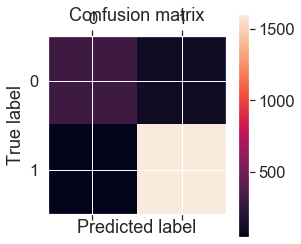

In [68]:
### Détermination des résultats du modèle sur la base de test
for x,y in [ (X_train, y_train), (X_test, y_test) ]:
    yp  = rfc.predict(x)
    conf_mat = confusion_matrix(y, yp)      
    print(conf_mat)
plt.matshow(conf_mat)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [74]:
score_du_modèle = logisticRegr.score (X_test, y_test)
print(score_du_modèle)

0.8974604695735505


In [76]:
for x,y in [ (X_train, y_train), (X_test, y_test) ]:
    yp  = logisticRegr.predict(x)
    conf_mat = confusion_matrix(y, yp)      
    print(conf_mat)

[[ 639  409]
 [ 117 3702]]
[[ 269  163]
 [  51 1604]]


Text(0.5, 1.0, 'Variable Importance')

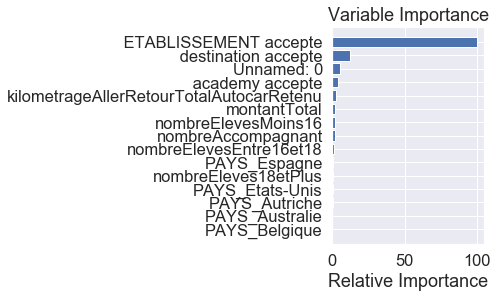

In [77]:
### Regardons l'importance de nos variables dans le modèle
feature_name = feat.columns
limit = 15
feature_importance = rfc.feature_importances_[:15]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_name[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

In [83]:
for x,y in [ (X_train, y_train), (X_test, y_test) ]:
    yp  = gboost.predict(x)
    conf_mat = confusion_matrix(y, yp)      
    print(conf_mat)

[[ 714  334]
 [ 104 3715]]
[[ 291  141]
 [  56 1599]]


In [87]:
for x,y in [ (X_train, y_train), (X_test, y_test) ]:
    yp  = logisticRegr.predict(x)
    conf_mat = confusion_matrix(y, yp)      
    print(conf_mat)

[[ 639  409]
 [ 117 3702]]
[[ 269  163]
 [  51 1604]]


In [91]:
feature_name = feat.columns
limit = 15
feature_importance = logisticRegr.feature_importances_[:15]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_name[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [101]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, yp)
cnf_matrix

array([[ 269,  163],
       [  51, 1604]], dtype=int64)

In [98]:
probabilité = logisticRegr.predict_proba(X_test)
probabilité

array([[0.06910465, 0.93089535],
       [0.08050435, 0.91949565],
       [0.05316021, 0.94683979],
       ...,
       [0.73363026, 0.26636974],
       [0.70414187, 0.29585813],
       [0.09297001, 0.90702999]])

In [103]:
print("Accuracy:",metrics.accuracy_score(y_test, yp))
print("Precision:",metrics.precision_score(y_test, yp))
print("Recall:",metrics.recall_score(y_test, yp))

Accuracy: 0.8974604695735505
Precision: 0.9077532541029995
Recall: 0.9691842900302114
